<a href="https://colab.research.google.com/github/adityafsyah/adtprojects/blob/main/Prediksi_Kebakaran_RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediksi Kebakaran Hutan Berdasarkan Titik Panas dan Iklim Menggunakan Algoritma Random Forest

# Read Dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')

%cd '/content/drive/MyDrive/Colab Notebooks/PrediksiKebakaran-2023'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Colab Notebooks/PrediksiKebakaran-2023


In [2]:
import pandas as pd

# Membaca file dataset yang diunggah
data = pd.read_excel('data-gabungan-full-tahun2023.xlsx')
data

,tanggal,tingkat kepercayaan,curah_hujan,sinar_matahari,kelembapan,temperatur
0,2023-01-07,8,34.5,2.1,85,27.4
1,2023-01-13,8,1.8,2.5,81,27.9
2,2023-01-13,8,1.8,2.5,81,27.9
3,2023-01-28,8,1.0,1.9,86,26.7
4,2023-01-28,8,1.0,1.9,86,26.7
...,...,...,...,...,...,...
4339,2023-12-20,8,0.6,1.8,76,30.4
4340,2023-12-30,8,62.6,5.6,81,29.3
4341,2023-12-27,8,36.9,4.3,78,30.1
4342,2023-12-31,8,61.7,6.4,80,29.2


# Pemahaman Data

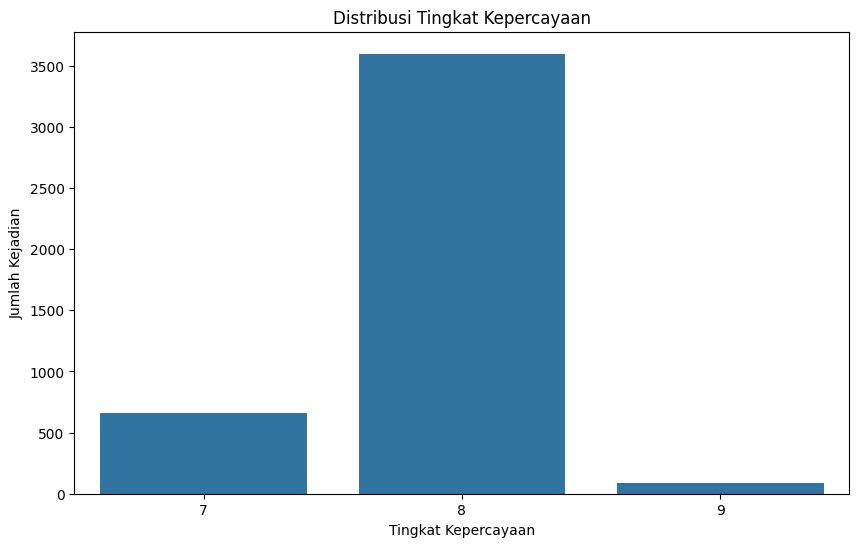

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Analyzing the distribution of 'tingkat kepercayaan'
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='tingkat kepercayaan')
plt.title('Distribusi Tingkat Kepercayaan')
plt.xlabel('Tingkat Kepercayaan')
plt.ylabel('Jumlah Kejadian')
plt.show()

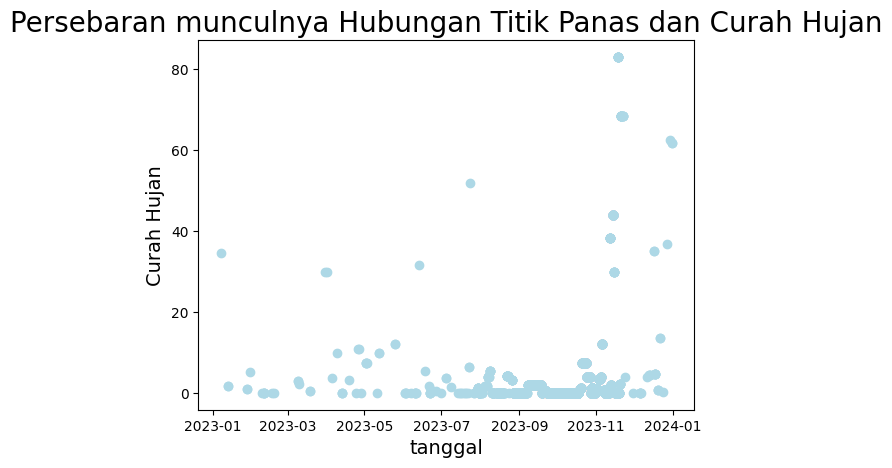

In [4]:
import matplotlib.pyplot as plt

plt.scatter(data['tanggal'], data['curah_hujan'], color='lightblue', marker='o')

# Menambahkan judul dan label sumbu
plt.title('Persebaran munculnya Hubungan Titik Panas dan Curah Hujan', fontsize=20)
plt.xlabel('tanggal', fontsize=14)
plt.ylabel('Curah Hujan', fontsize=14)

# Menampilkan scatter plot
plt.show()

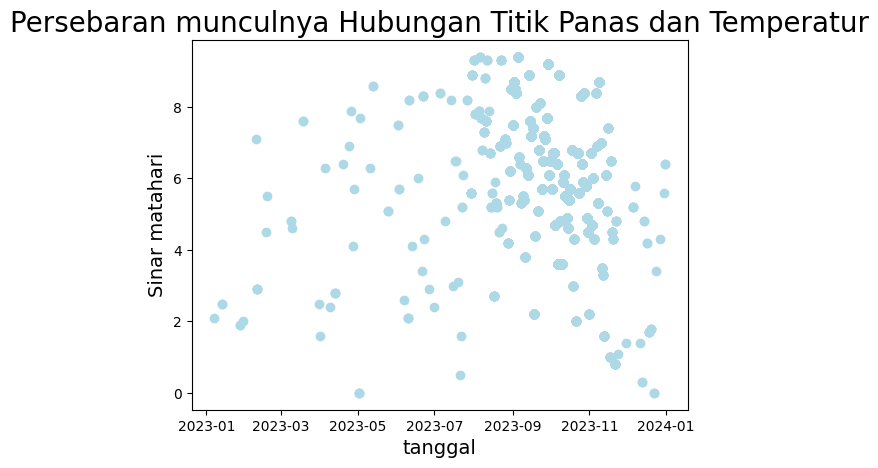

In [5]:
import matplotlib.pyplot as plt

plt.scatter(data['tanggal'], data['sinar_matahari'], color='lightblue', marker='o')

# Menambahkan judul dan label sumbu
plt.title('Persebaran munculnya Hubungan Titik Panas dan Temperatur', fontsize=20)
plt.xlabel('tanggal', fontsize=14)
plt.ylabel('Sinar matahari', fontsize=14)

# Menampilkan scatter plot
plt.show()

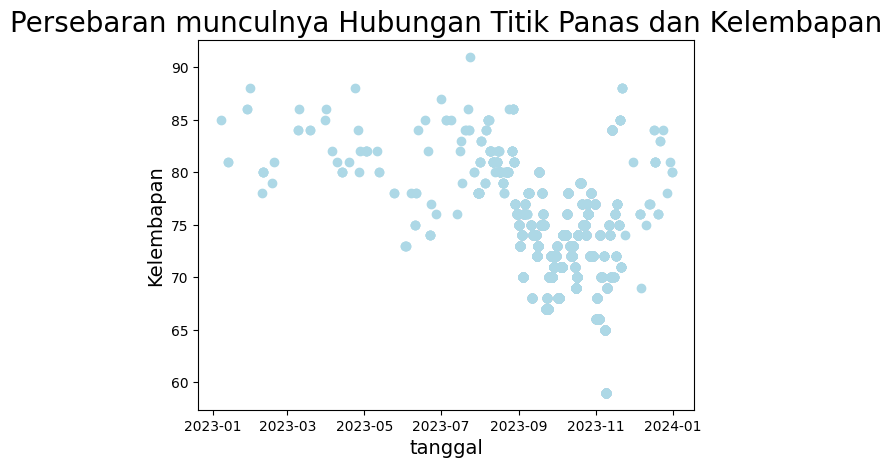

In [6]:
import matplotlib.pyplot as plt

plt.scatter(data['tanggal'], data['kelembapan'], color='lightblue', marker='o')

# Menambahkan judul dan label sumbu
plt.title('Persebaran munculnya Hubungan Titik Panas dan Kelembapan', fontsize=20)
plt.xlabel('tanggal', fontsize=14)
plt.ylabel('Kelembapan', fontsize=14)

# Menampilkan scatter plot
plt.show()

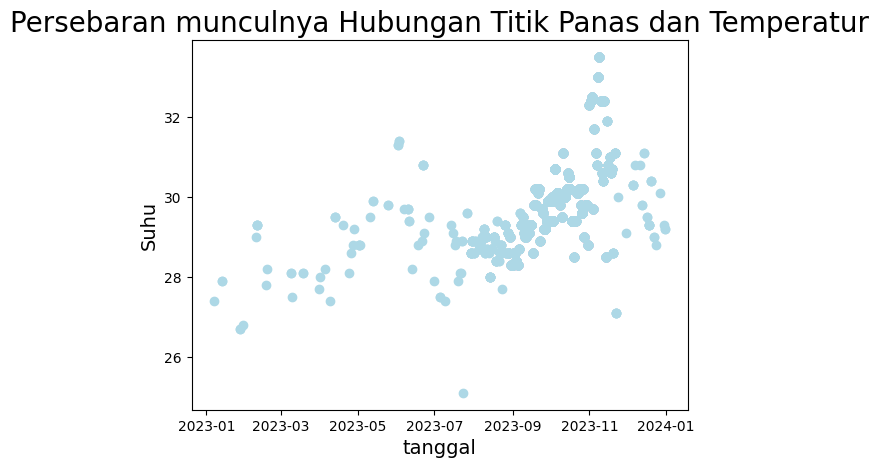

In [7]:
import matplotlib.pyplot as plt

plt.scatter(data['tanggal'], data['temperatur'], color='lightblue', marker='o')

# Menambahkan judul dan label sumbu
plt.title('Persebaran munculnya Hubungan Titik Panas dan Temperatur', fontsize=20)
plt.xlabel('tanggal', fontsize=14)
plt.ylabel('Suhu', fontsize=14)

# Menampilkan scatter plot
plt.show()

# Transformasi Data

In [8]:
# Labeling data tingkat kepercayaan menjadi biner
# Nilai >= 8 dianggap sebagai kebakaran (1), selain itu tidak (0)
data['kebakaran'] = (data['tingkat kepercayaan'] >= 8).astype(int)

# Menampilkan beberapa baris data setelah transformasi
data

,tanggal,tingkat kepercayaan,curah_hujan,sinar_matahari,kelembapan,temperatur,kebakaran
0,2023-01-07,8,34.5,2.1,85,27.4,1
1,2023-01-13,8,1.8,2.5,81,27.9,1
2,2023-01-13,8,1.8,2.5,81,27.9,1
3,2023-01-28,8,1.0,1.9,86,26.7,1
4,2023-01-28,8,1.0,1.9,86,26.7,1
...,...,...,...,...,...,...,...
4339,2023-12-20,8,0.6,1.8,76,30.4,1
4340,2023-12-30,8,62.6,5.6,81,29.3,1
4341,2023-12-27,8,36.9,4.3,78,30.1,1
4342,2023-12-31,8,61.7,6.4,80,29.2,1


Kolom tingkat kepercayaan telah diubah menjadi format 1 dan 0 dalam kolom baru kebakaran, di mana nilai 1 menunjukkan kebakaran (untuk nilai tingkat kepercayaan yang lebih besar atau sama dengan 8) dan 0 menunjukkan tidak adanya kebakaran (untuk nilai tingkat kepercayaan di bawah 8).

Dengan transformasi ini, Anda sekarang dapat melanjutkan ke tahap selanjutnya dari pembuatan model pembelajaran mesin, seperti pemilihan fitur, pembagian data, dan pelatihan model

# Seleksi Fitur - Splitting Data Training dan Testing

In [9]:
from sklearn.model_selection import train_test_split

# Memilih fitur dan label
X = data[['curah_hujan', 'sinar_matahari', 'kelembapan', 'temperatur']]
y = data['kebakaran']

# Membagi data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [10]:
# Menampilkan ukuran dari setiap set
(X_train.shape, y_train.shape), (X_test.shape, y_test.shape)

(((3040, 4), (3040,)), ((1304, 4), (1304,)))

Variabel x  dilakukan dengan memilih data iklim: `curah_hujan`, `sinar_matahari`, `kelembapan`, dan `temperatur`. Dataset telah dibagi menjadi dua bagian:

1. **Set Pelatihan**:
   - Fitur (X_train): 3040 sampel
   - Label (y_train): 3040 sampel

2. **Set Pengujian**:
   - Fitur (X_test): 1304 sampel
   - Label (y_test): 1304 sampel

In [11]:
import sklearn
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

import seaborn as sns
import matplotlib.pyplot as plt

# Model Prediksi Random Forest

In [12]:
# Membuat dan melatih model Random Forest
rf_model = RandomForestClassifier(n_estimators=300, max_depth=10, criterion='gini', random_state=42)
rf_model.fit(X_train, y_train)

# Membuat prediksi pada set pengujian
y_pred = rf_model.predict(X_test)

# Menghitung akurasi dan hasil klasifikasi
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Menampilkan hasil
print("\nAkurasi model Random Forest:")
print(accuracy)
print("\nLaporan klasifikasi:")
print(classification_rep)


Akurasi model Random Forest:
0.8588957055214724

Laporan klasifikasi:
              precision    recall  f1-score   support

           0       0.64      0.19      0.29       201
           1       0.87      0.98      0.92      1103

    accuracy                           0.86      1304
   macro avg       0.76      0.59      0.61      1304
weighted avg       0.83      0.86      0.82      1304



In [13]:
# Menampilkan hasil
print("\nAkurasi model Random Forest:")
print(accuracy)


Akurasi model Random Forest:
0.8588957055214724


In [14]:
pip install graphviz

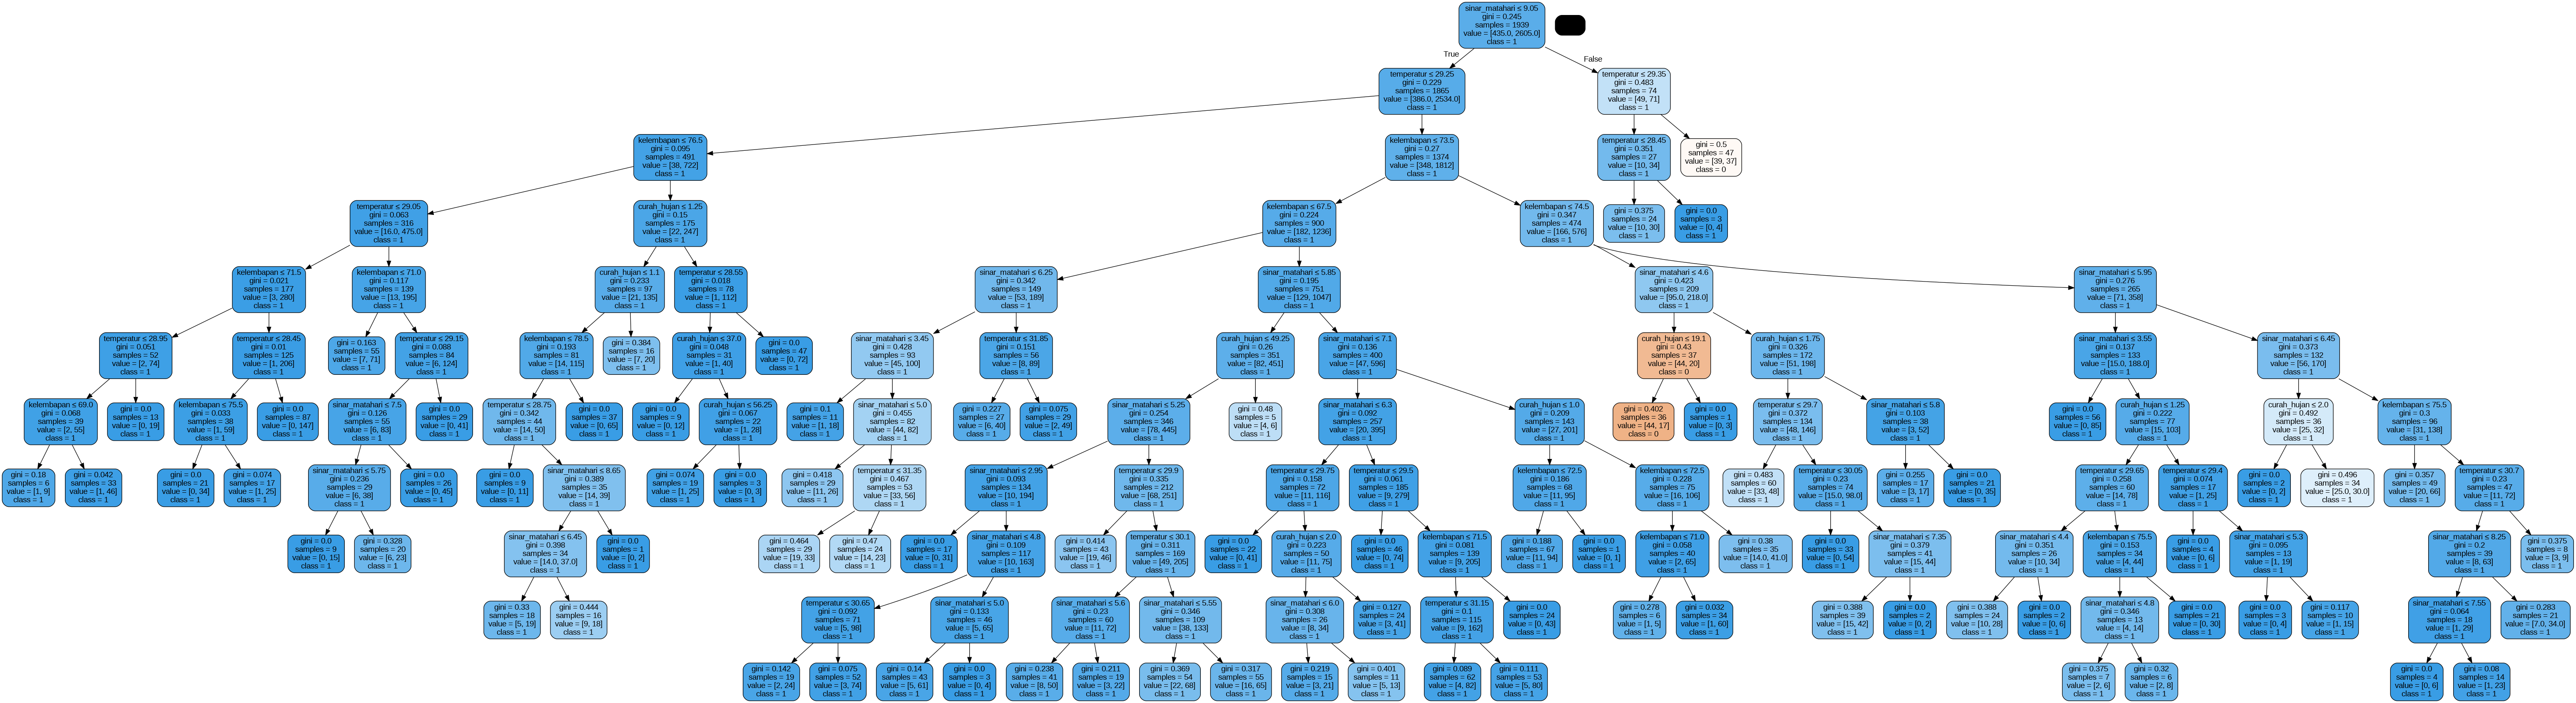

In [15]:
from sklearn.tree import export_graphviz
import pydotplus
import six
from IPython.display import Image

# Choose one tree from the Random Forest (e.g., the first tree)
tree = rf_model.estimators_[0]

# Export the chosen tree to a Graphviz format
dot_data = export_graphviz(tree, out_file=None,
                           feature_names=X_train.columns,
                           class_names=['0', '1'],
                           filled=True, rounded=True,
                           special_characters=True)

# Create a graph from the Graphviz format
graph = pydotplus.graph_from_dot_data(dot_data)

# Display the graph
Image(graph.create_png())

# Evaluasi Model

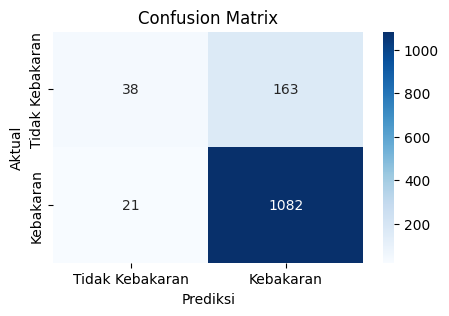


Laporan klasifikasi:
              precision    recall  f1-score   support

           0       0.64      0.19      0.29       201
           1       0.87      0.98      0.92      1103

    accuracy                           0.86      1304
   macro avg       0.76      0.59      0.61      1304
weighted avg       0.83      0.86      0.82      1304



In [16]:
# Membuat confusion matrix dari hasil terakhir
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=['Tidak Kebakaran', 'Kebakaran'],
            yticklabels=['Tidak Kebakaran', 'Kebakaran'])
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix')
plt.show()

classification_rep = classification_report(y_test, y_pred)
print("\nLaporan klasifikasi:")
print(classification_rep)

In [18]:
# Mendapatkan fitur penting dari model Random Forest
feature_importances = rf_model.feature_importances_

# Membuat dataframe untuk fitur penting
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

feature_importance_df

,Feature,Importance
1,sinar_matahari,0.477475
3,temperatur,0.257086
2,kelembapan,0.200452
0,curah_hujan,0.064987
